In [70]:
import sys
import numpy as np
import pandas as pd

sys.path.append(r"C:\Users\marcu\Documents\Quant\Programming\real_estate")

In [76]:
from models.random_variables import *
from models.expense_model import ExpenseModel
from models.revenue_model import RevenueModel
from models.tax_benefit_model import TaxBenefitModel
from models.monte_carlo_simulator import MonteCarloSimulator

In [99]:
N_SIMULATIONS: int = 1_000
N_PAYMENTS_PER_PERIOD: int = 12 
N_PERIODS: int = 30 * N_PAYMENTS_PER_PERIOD
RATE: float = 0.065 / N_PAYMENTS_PER_PERIOD

RENT: float = 4_000.0
DEBT: float = 250_000.0
EQUITY: float = 100_000.0

EXPENSE_MODEL: ExpenseModel = ExpenseModel()
REVENUE_MODEL: RevenueModel = RevenueModel()
TAX_BENEFIT_MODEL: TaxBenefitModel = TaxBenefitModel()

PERCENT_TAX_EXPENSE: float = 0.02 / N_PAYMENTS_PER_PERIOD
TAX_EXPENSE_MU: float = PERCENT_TAX_EXPENSE * (DEBT + EQUITY)
TAX_EXPENSE: RandomVariable = NormalRandomVariable(mu=TAX_EXPENSE_MU) 

OCCUPANCY_RATE_PROBABILITY: float = 0.9
OCCUPANCY_RATE: RandomVariable = IndicatorRandomVariable(probability=OCCUPANCY_RATE_PROBABILITY)

UTILITY_EXPENSE_MU: float = 100.0
UTILITY_EXPENSE_SIGMA: float = 20.0
UTILITY_EXPENSE_LOWER_BOUND: float = 50.0
UTILITY_EXPENSE_UPPER_BOUND: float = 200.0
UTILITY_EXPENSE: RandomVariable = BoundedNormalRandomVariable(mu=UTILITY_EXPENSE_MU, sigma=UTILITY_EXPENSE_SIGMA, lower_bound=UTILITY_EXPENSE_LOWER_BOUND, upper_bound=UTILITY_EXPENSE_UPPER_BOUND)

INSURACE_EXPENSE_MU: float = 100.0
INSURACE_EXPENSE_SIGMA: float = 20.0
INSURANCE_EXPENSE_LOWER_BOUND: float = 20.0
INSURANCE_EXPENSE_UPPER_BOUND: float = 200.0
INSURACE_EXPENSE: RandomVariable = BoundedNormalRandomVariable(mu=INSURACE_EXPENSE_MU, sigma=INSURACE_EXPENSE_SIGMA, lower_bound=INSURANCE_EXPENSE_LOWER_BOUND, upper_bound=INSURANCE_EXPENSE_UPPER_BOUND)

MAINTENANCE_EXPENSE_MU: float = 100.0
MAINTENANCE_EXPENSE_SIGMA: float = 20.0
MAINTENANCE_EXPENSE_LOWER_BOUND: float = 20.0
MAINTENANCE_EXPENSE_UPPER_BOUND: float = 200.0
MAINTENANCE_EXPENSE: RandomVariable = BoundedNormalRandomVariable(mu=MAINTENANCE_EXPENSE_MU, sigma=MAINTENANCE_EXPENSE_SIGMA, lower_bound=MAINTENANCE_EXPENSE_LOWER_BOUND, upper_bound=MAINTENANCE_EXPENSE_UPPER_BOUND)

MISCELLANEOUS_EXPENSE_MU: float = 0.0
MISCELLANEOUS_EXPENSE_SIGMA: Optional[float] = 250.0
MISCELLANEOUS_EXPENSE: RandomVariable = BoundedNormalRandomVariable(mu=MISCELLANEOUS_EXPENSE_MU, sigma=MISCELLANEOUS_EXPENSE_SIGMA, lower_bound=0.0, upper_bound=2000.0)

In [100]:
simulation = MonteCarloSimulator(
    debt=DEBT,
    rate=RATE,      
    rent=RENT, 
    equity=EQUITY,
    expense_model=EXPENSE_MODEL,
    revenue_model=REVENUE_MODEL,
    tax_benefit_model=TAX_BENEFIT_MODEL,
    n_periods=N_PERIODS,
    n_simulations=N_SIMULATIONS, 
    property_tax_expense=TAX_EXPENSE,
    occupancy_rate=OCCUPANCY_RATE,      
    utility_expense=UTILITY_EXPENSE, 
    insurance_expense=INSURACE_EXPENSE,
    maintenance_expense=MAINTENANCE_EXPENSE,
    miscellaneous_expense=MISCELLANEOUS_EXPENSE
)

In [101]:
simulation.run()

<Axes: >

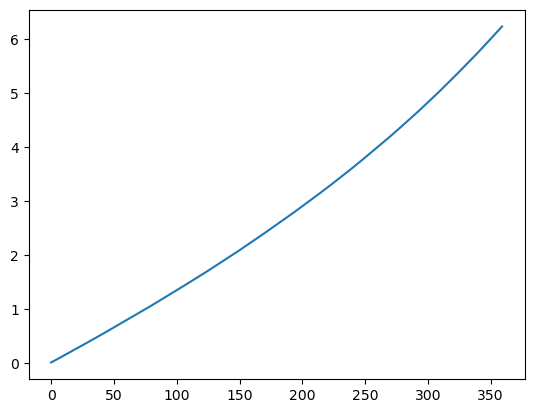

In [104]:
simulation.cumulative_total_return_on_initial_equity.mean(axis=1).plot()

In [105]:
6**(1/30)

1.0615449167090512

In [111]:
x = []
for i, v in simulation.cash_flow_simulation.T.items():
    
    if i != 0:
        x.append((v + x[i-1]) * (1 + 0.05 / 12))
    else:
        x.append(v * (1 + 0.05 / 12))


<Axes: >

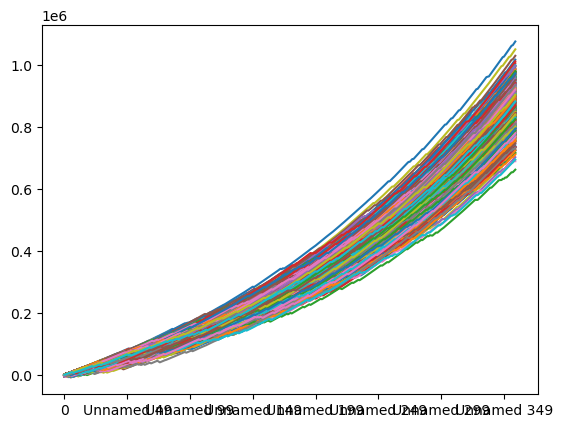

In [112]:
pd.DataFrame(x).plot(legend=False)

In [113]:
x[-1]

0      905562.712837
1      768042.730923
2      853736.356282
3      870572.343368
4      862992.276367
           ...      
995    881161.751640
996    921079.636208
997    934013.061120
998    903547.525079
999    882173.575339
Length: 1000, dtype: float64

In [106]:
10 ** (1 / 30) - 1

0.07977516232770965

In [38]:
np.array(x)

(360, 360)

<Axes: >

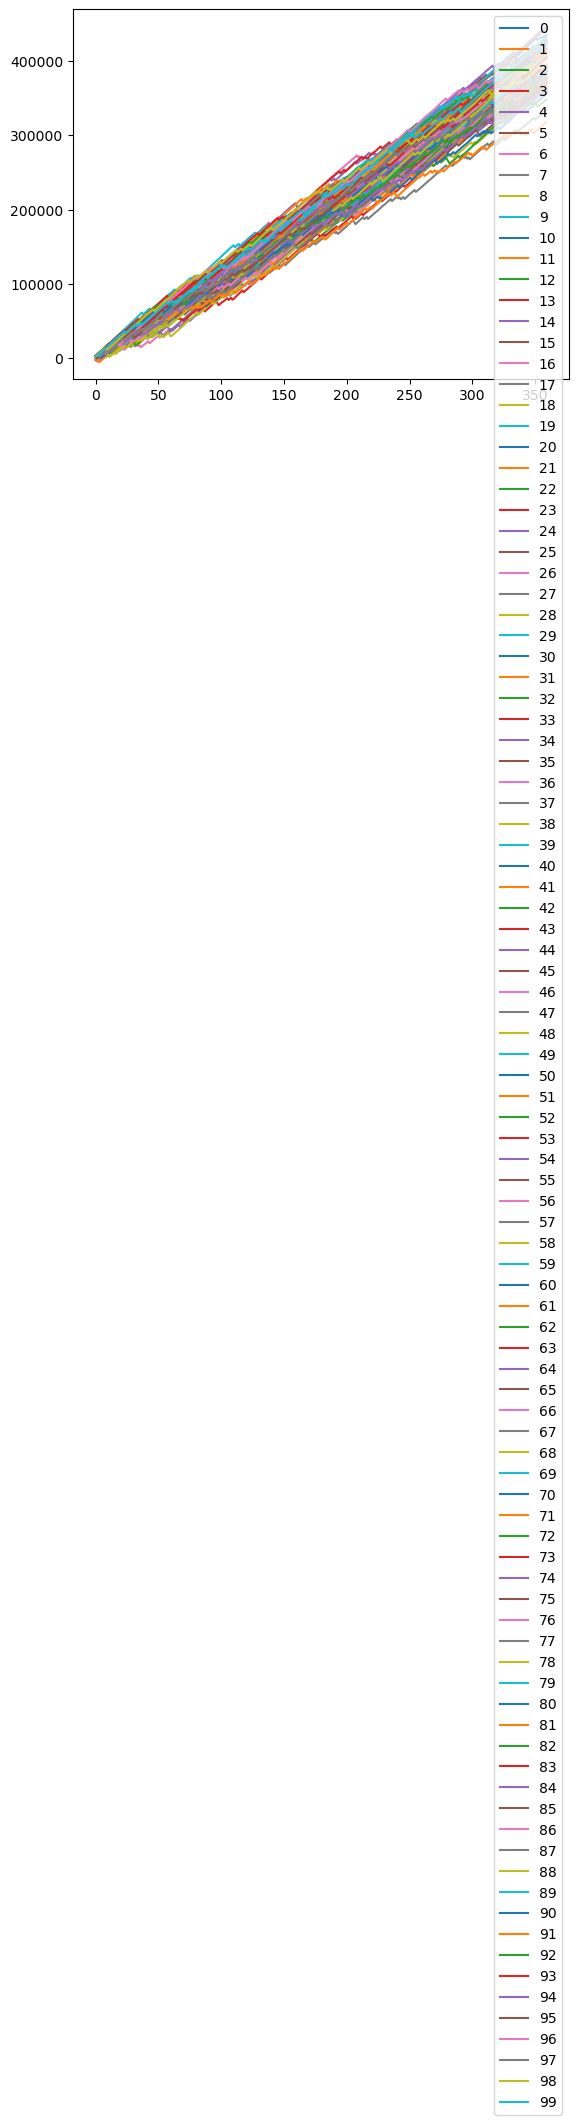

In [19]:
(pd.DataFrame(np.cumsum(simulation.cash_flow_simulation, axis=0)).iloc[:, :100]).plot()



<Axes: >

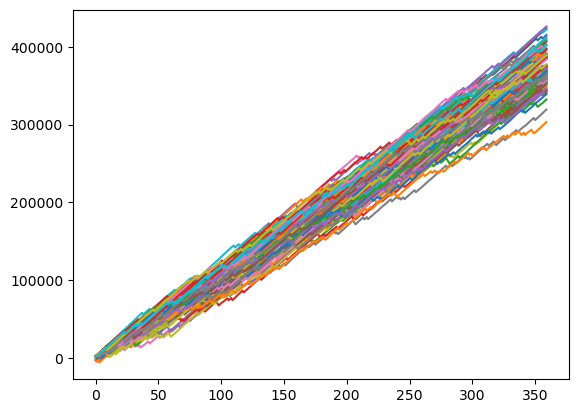

In [17]:
pd.DataFrame(np.cumsum(simulation.cash_flow_simulation, axis=0)).iloc[:, :100].plot(legend=False)

In [ ]:
simulation.cumulative_total_return_on_initial_equity.iloc[-1].plot(kind='hist')

<Axes: ylabel='Frequency'>

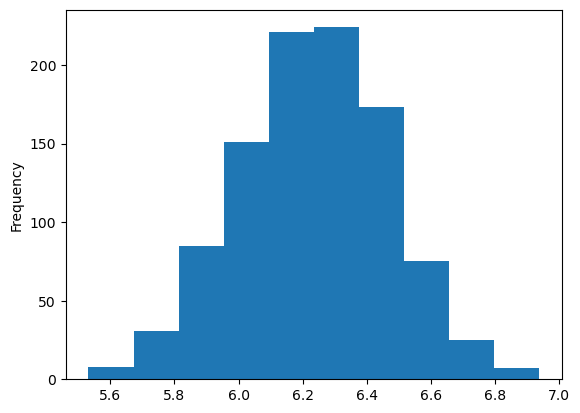

In [11]:
simulation.cumulative_total_return_on_initial_equity.iloc[-1].plot(kind='hist')

<Axes: >

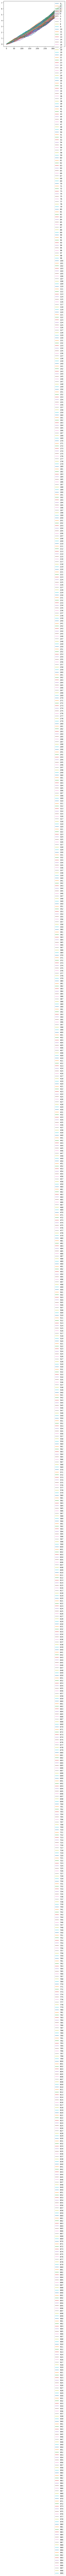

In [7]:
simulation.cumulative_total_return_on_initial_equity.plot()

In [10]:
simulation.total_return_on_initial_equity

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.024955,-0.995891,-0.996506,-0.995840,-0.999197,-1.025494,-0.995574,-0.994128,-0.993956,-0.998547,...,-0.994597,-1.028207,-0.998180,-0.993926,-0.997612,-0.994443,-0.994183,-0.997955,-0.994942,-0.998623
1,-0.994558,-1.002269,-0.998758,-1.024741,-0.998643,-0.993399,-0.995426,-0.999526,-0.995885,-0.994105,...,-0.992404,-1.000847,-0.995049,-0.996578,-0.996155,-0.995982,-1.027743,-1.000723,-0.997395,-0.992115
2,-0.995528,-0.996324,-0.998674,-1.000321,-1.000245,-0.995491,-0.995652,-0.996349,-1.002865,-0.993039,...,-0.998384,-1.000511,-0.993166,-0.996412,-0.995855,-1.025478,-1.002261,-0.997836,-0.992369,-1.002093
3,-0.992049,-0.992367,-0.991595,-0.995487,-0.992300,-0.993893,-0.999181,-0.994789,-1.028102,-0.993355,...,-1.027309,-0.996855,-0.994915,-1.027226,-1.024893,-0.996719,-0.997135,-1.002447,-1.027545,-0.996521
4,-0.995324,-0.996665,-0.994698,-0.995943,-0.994335,-0.994299,-0.998767,-0.996264,-0.995367,-0.993367,...,-0.994855,-0.996002,-0.992138,-0.998184,-0.997815,-0.999419,-0.997731,-0.998566,-1.001557,-1.000243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-0.983983,-0.988970,-0.980190,-0.986660,-0.987972,-0.980474,-1.012171,-0.980531,-0.984568,-0.982137,...,-0.982984,-0.984900,-1.013088,-0.985106,-0.984969,-0.986558,-0.983726,-0.979526,-0.979025,-0.983093
356,-0.985648,-0.986478,-0.981134,-0.981444,-0.982496,-0.982218,-0.984154,-0.987141,-0.985562,-0.983009,...,-0.981809,-0.984905,-1.010991,-0.984548,-0.984251,-0.985218,-1.012613,-0.985096,-0.985968,-0.983318
357,-0.983029,-0.990880,-0.980515,-0.980108,-0.979525,-0.984779,-0.985110,-0.987083,-0.984618,-0.982180,...,-0.984987,-1.014889,-0.980491,-0.979646,-0.988224,-0.985860,-0.982493,-0.982013,-0.981029,-0.979867
358,-0.987386,-0.980743,-0.978241,-0.982175,-0.983093,-0.982513,-0.980501,-0.983184,-0.982865,-0.985950,...,-0.984502,-0.981347,-0.980895,-0.983820,-0.981380,-0.981348,-0.988160,-0.984477,-0.981837,-0.987412


<Axes: >

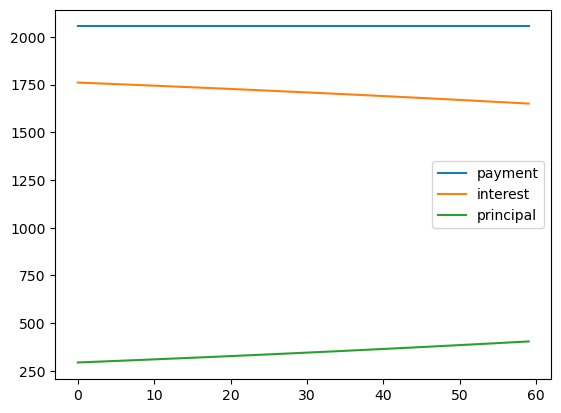

In [768]:
simulation.ammortization_schedule.schedule.head(12*5).iloc[:, :3].plot()

Mean Cash Flow: 172164.24468516564
Min Cash Flow: 85217.55451244334
Max Cash Flow: 235312.38570697026


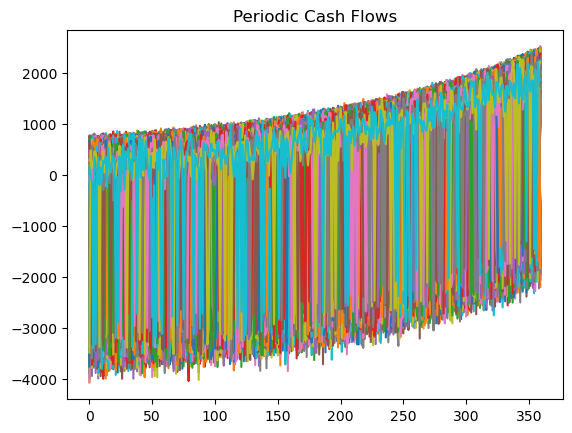

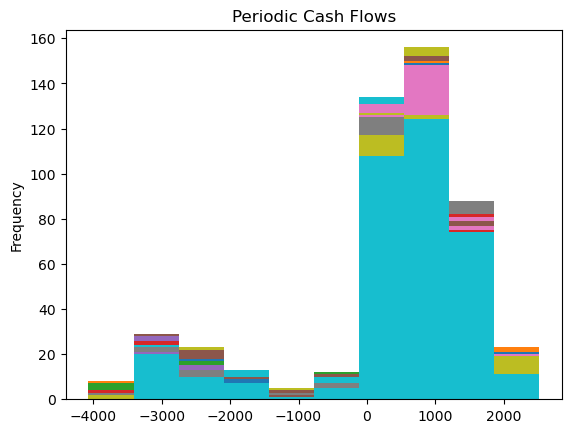

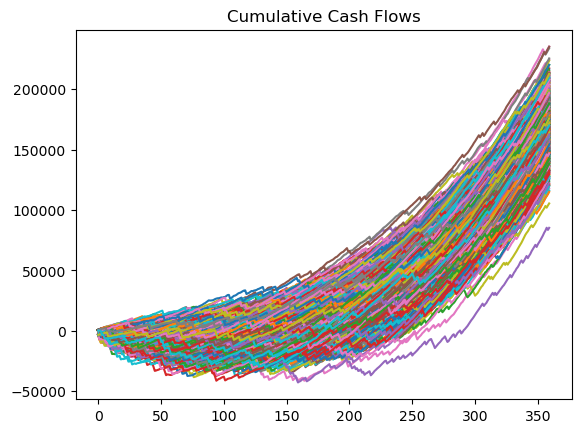

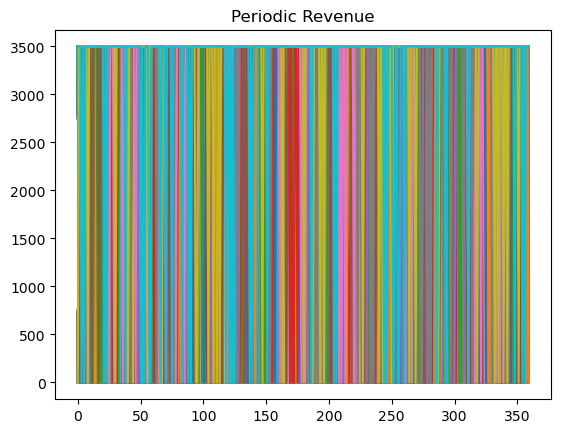

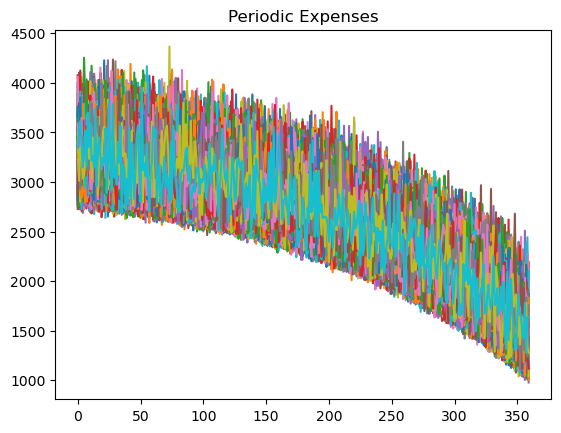

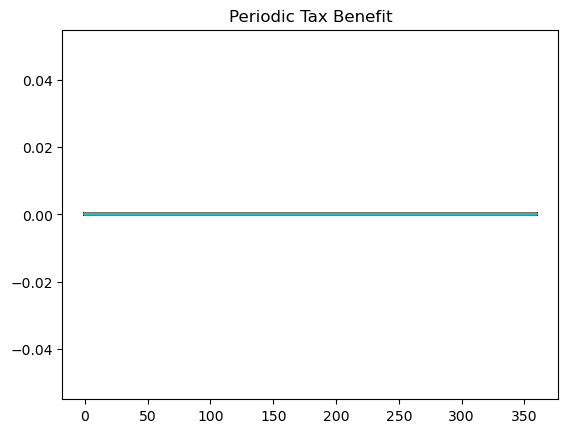

In [774]:
simulation.analyze()